In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
from tensorflow.keras.models import load_model
import numpy as np 

In [2]:
loaded_model = load_model('Trafic_signs_model_final.h5')

In [3]:
# Load dictionary for translating predictions
a_file = open("char_to_int.pkl", "rb")
char_to_int = pickle.load(a_file)
print(char_to_int)

{'100_SIGN': 0, '10_SIGN': 1, '110_SIGN': 2, '120_SIGN': 3, '130_SIGN': 4, '15_SIGN': 5, '20_SIGN': 6, '25_SIGN': 7, '30_SIGN': 8, '40_SIGN': 9, '50_SIGN': 10, '5_SIGN': 11, '60_SIGN': 12, '70_SIGN': 13, '80_SIGN': 14, '80_SIGN_END': 15, '90_SIGN': 16, 'ALL_END': 17, 'BUMP': 18, 'CHILDREN': 19, 'CROSSROADS_PRIORITY_RIGHT': 20, 'CROSSROADS_WITH_MINOR': 21, 'CURVES_FIRST_LEFT': 22, 'CURVES_FIRST_RIGHT': 23, 'CURVE_LEFT': 24, 'CURVE_RIGHT': 25, 'CYCLE_PATH': 26, 'CYCLISTS': 27, 'DANGER': 28, 'DOMESTIC_ANIMALS': 29, 'GIVE_WAY': 30, 'GIVE_WAY_TO_ONCOMING': 31, 'GO_LEFT': 32, 'GO_STRAIGHT': 33, 'GO_STRAIGHT_OR_TURN_LEFT': 34, 'GO_STRAIGHT_OR_TURN_RIGHT': 35, 'HEIGHT_LIMIT': 36, 'ICE_OR_SNOW': 37, 'LEVEL_CROSSING_WITH_BARRIERS_AHEAD': 38, 'MISC': 39, 'NO_ENTRY': 40, 'NO_LEFT_TURN': 41, 'NO_OVERTAKING': 42, 'NO_OVERTAKING_END': 43, 'NO_OVERTAKING_HEAVY': 44, 'NO_OVERTAKING_HEAVY_END': 45, 'NO_PARKING': 46, 'NO_PARKING_FROM_1ST_TO_15TH': 47, 'NO_PEDAL_CYCLES': 48, 'NO_RIGHT_TURN': 49, 'NO_STOPP

In [4]:
image = cv2.imread('image.jpg')

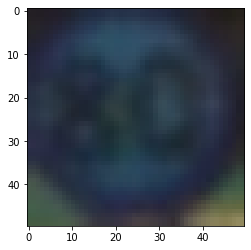

In [5]:
plt.imshow(image)

In [6]:
image = exposure.equalize_adapthist(image, clip_limit=0.1)
image = image.reshape((1,50,50,3))

In [7]:
def prediction_to_label(model, X_test, char_to_int):
    predictions = model.predict(X_test)
    predictions = [np.argmax(x) for x in predictions]
    int_to_char = {k:v for k,v in zip(char_to_int.values(),char_to_int.keys())}
    labels_predicted = [int_to_char[integer] for integer in predictions]
    return labels_predicted

In [8]:
prediction_to_label(loaded_model, image,char_to_int)

['80_SIGN']